In [27]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import json

# Load datasets
graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
students_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/students-major-data.csv', sep=';')

# Define key variables for analysis
P_WOJ = graduates_data['P_WOJ']  # Województwo lokalizacji jednostki dydaktycznej
P_ME_ZAR = graduates_data['P_ME_ZAR']  # Mediana wynagrodzeń absolwentów
P_WWZ = graduates_data['P_WWZ']  # Względny Wskaźnik Zarobków
P_WWB = graduates_data['P_WWB']  # Względny Wskaźnik Bezrobocia
P_WWB_DOSW = graduates_data['P_WWB_DOSW']  # Wskaźnik Bezrobocia dla absolwentów z doświadczeniem
P_WWB_NDOSW = graduates_data['P_WWB_NDOSW']  # Wskaźnik Bezrobocia dla absolwentów bez doświadczenia
P_CZAS_PRACA_DOSW = graduates_data['P_CZAS_PRACA_DOSW']  # Czas do pierwszej pracy dla absolwentów z doświadczeniem
P_CZAS_PRACA_NDOSW = graduates_data['P_CZAS_PRACA_NDOSW']  # Czas do pierwszej pracy dla absolwentów bez doświadczenia
P_ME_ZAR_DOSW = graduates_data['P_ME_ZAR_DOSW']  # Mediana wynagrodzeń dla absolwentów z doświadczeniem
P_ME_ZAR_NDOSW = graduates_data['P_ME_ZAR_NDOSW']  # Mediana wynagrodzeń dla absolwentów bez doświadczenia
# P_N = students_data['P_N']  # Liczba studentów
P_N = graduates_data['P_N'] # Liczba absolwentów
P_POZIOM = graduates_data['P_POZIOM']  # Poziom studiów
P_FORMA = graduates_data['P_FORMA']  # Forma studiów
P_ROKDYP = graduates_data['P_ROKDYP'] # Rok ukończenia studiów
P_ROK_OD = students_data['P_ROK_OD'] # Rok rozpoczęcia studiów
P_KIERUNEK_NAZWA = graduates_data['P_KIERUNEK_NAZWA'] # Pełna nazwa kierunku
P_ME_ZAR_P1 = graduates_data['P_ME_ZAR_P1'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 1 roku po uzyskaniu dyplomu
P_ME_ZAR_P2 = graduates_data['P_ME_ZAR_P2'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 2 roku po uzyskaniu dyplomu
P_ME_ZAR_P3 = graduates_data['P_ME_ZAR_P3'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 3 roku po uzyskaniu dyplomu
P_ME_ZAR_P4 = graduates_data['P_ME_ZAR_P4'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 4 roku po uzyskaniu dyplomu
P_ME_ZAR_P5 = graduates_data['P_ME_ZAR_P5'] # Mediana średnich miesięcznych wynagrodzeń absolwentów ze wszystkich źródeł w 5 roku po uzyskaniu dyplomu
P_N_SEMESTR = graduates_data['P_N_SEMESTR'] # Liczba semestrów
P_NAZWA_UCZELNI = graduates_data['P_NAZWA_UCZELNI'] # Nazwa uczelni

# Convert selected columns with numeric strings to float
for col in graduates_data.columns:
    if any(keyword in col for keyword in ['P_ME', 'P_WWZ', 'P_WWB', 'P_CZAS']):
        graduates_data[col] = graduates_data[col].astype(str).str.replace(',', '.')
        graduates_data[col] = pd.to_numeric(graduates_data[col], errors='coerce')


/tmp/ipykernel_5744/4222050872.py:9: DtypeWarning: Columns (13,14,15,16,17,18,19,57,59,61,63,65,67,81,83,85,87,89,91,105,106,108,109,111,112,114,115,117,118,120,121,135,136,138,139,141,142,144,145,147,148,150,151,165,166,168,169,171,172,174,175,177,178,180,181,195,196,198,199,201,202,204,205,207,208,210,211,225,226,229,230,232,233,235,236,238,239,241,242,256,257,259,260,262,263,265,266,268,269,271,272,288,299,300,301,303,304,306,307,309,310,312,313,315,316,330,331,337,338,340,341,343,344,346,347,349,350,364,365,367,368,370,371,373,374,376,377,379,380,394,395,403,404,406,407,409,410,412,413,415,416,430,431,433,434,436,437,439,440,442,443,445,446) have mixed types. Specify dtype option on import or set low_memory=False.
  graduates_data = pd.read_csv('/home/jkskw/git/ela_analysis/data/graduates-major-data.csv', sep=';')
/tmp/ipykernel_5744/4222050872.py:10: DtypeWarning: Columns (9,18,23,30,64,71,78,85,92,99,106,113,120) have mixed types. Specify dtype option on import or set low_memory=

In [28]:
# Function to map a field to a category based on keywords
def add_field_column(dataframe, column_name):
    """
    Add a new column 'Dziedzina' to the given DataFrame based on keywords in the specified column.
    
    Args:
        dataframe (pd.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column containing course names.

    Returns:
        pd.DataFrame: The updated DataFrame with the new 'Dziedzina' column.
    """
    # Dictionary mapping phrases to fields
    keywords_to_dziedzina = {
        "Prawo": "Nauki prawne",
        "Psychol": "Psychologia",
        "Automat": "Automatyka",
        "Informat": "Informatyka",
        "Zarządzanie": "Zarządzanie",
        "lekarski": "Kierunek lekarski",
        "Ekonom": "Ekonomia",
        "Mechani": "Inżynieria mechaniczna",
        "Chem": "Chemia",
        "Budowni": "Inżynieria lądowa",
        "Archit": "Architektura",
        "Elektr": "Inżynieria elektryczna",
        "środowi": "Inżynieria środowiskowa",
    }
    
    # Function to assign a field based on keywords
    def assign_field(course_name):
        for keyword, field in keywords_to_dziedzina.items():
            if keyword.lower() in course_name.lower():  # Check if keyword exists in the course name
                return field
        return "Inne"  # Assign "Inne" if no match is found

    # Apply the function to create the new column
    dataframe['Dziedzina'] = dataframe[column_name].apply(assign_field)

    return dataframe

# Apply the function to the graduates_data DataFrame
graduates_data = add_field_column(graduates_data, 'P_KIERUNEK_NAZWA')

/tmp/ipykernel_5744/2849430647.py:38: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  dataframe['Dziedzina'] = dataframe[column_name].apply(assign_field)


In [29]:
def add_adjusted_salary_columns(data, median_dict):
    """
    Adds columns to the graduates_data DataFrame where the value is
    P_ME_ZAR_P1 through P_ME_ZAR_P5 divided by the median salary based on the year in P_ROKDYP.

    Args:
        data (pd.DataFrame): The graduates_data DataFrame.
        median_dict (dict): A dictionary containing median salaries for specific years.

    Returns:
        pd.DataFrame: The updated DataFrame with the new columns.
    """
    # Define the corresponding salary and new column suffixes
    salary_columns = [f"P_ME_ZAR_P{i}" for i in range(1, 6)]
    adjusted_columns = [f"P_WWZ_P{i}" for i in range(1, 6)]

    # Function to calculate the adjusted salary for a specific column
    def calculate_adjusted_salary(row, salary_column, offset):
        year = row['P_ROKDYP'] + offset
        if year in median_dict:
            return row[salary_column] / median_dict[year]
        return None  # Return None if the year is not in the median dictionary

    # Loop through each salary column and create the corresponding adjusted column
    for i, (salary_col, adjusted_col) in enumerate(zip(salary_columns, adjusted_columns), start=1):
        offset = i  # P_ME_ZAR_P1 corresponds to +1 year, P_ME_ZAR_P2 to +2 years, etc.
        data[adjusted_col] = data.apply(lambda row: calculate_adjusted_salary(row, salary_col, offset), axis=1)

    return data

# Define the median dictionary
median = {
2014: 3291.56,
2015: 3401.11,
2016: 3510.67,
2017: 3802.82,
2018: 4094.98,
2019: 4398.82,
2020: 4702.66,
2021: 5202.14,
2022: 5701.62,
2023: 6100.81,
2024: 6500.00
}

# Add the new column to graduates_data
graduates_data = add_adjusted_salary_columns(graduates_data, median)

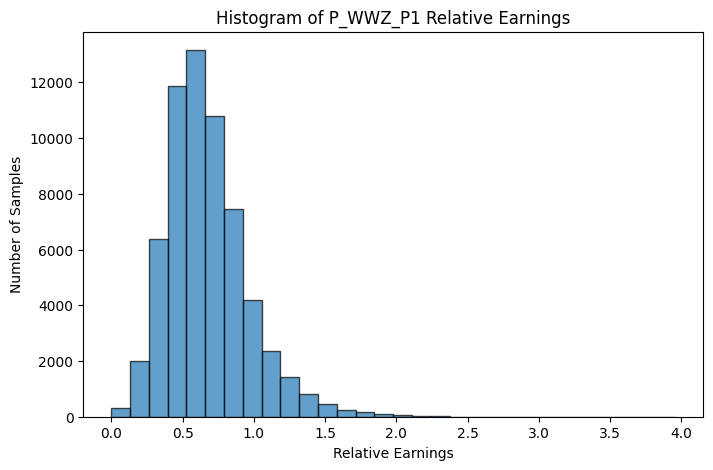

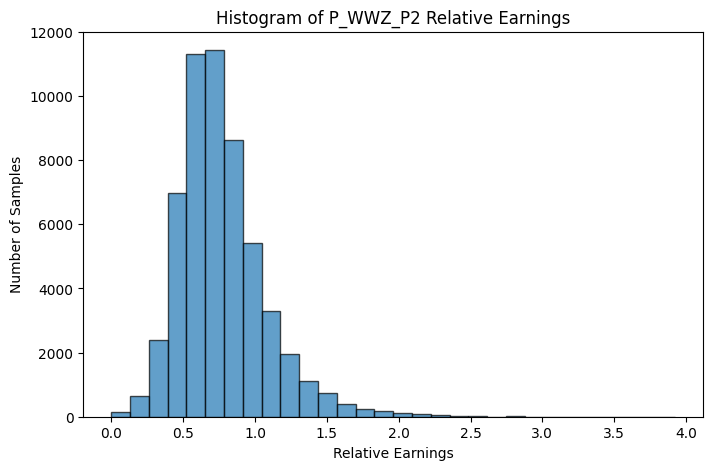

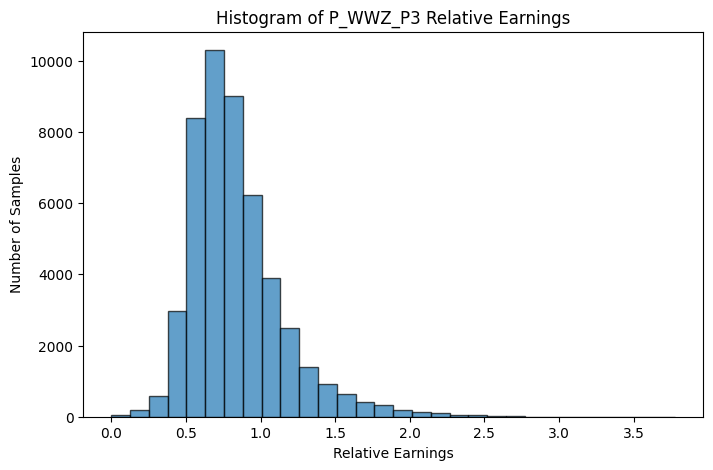

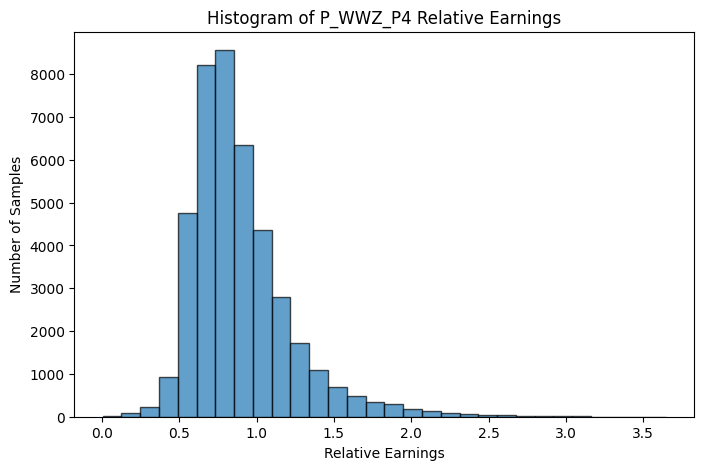

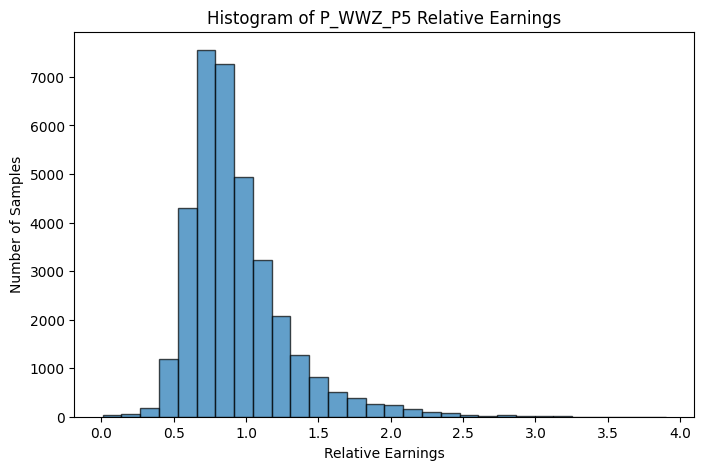

In [23]:
def plot_relative_salary_histograms(data, column_prefix="P_WWZ_P"):
    """
    Plots histograms for the relative salary columns (e.g., P_WWZ_P1 to P_WWZ_P5).

    Args:
        data (pd.DataFrame): The DataFrame containing the relative salary columns.
        column_prefix (str): The prefix of the columns to plot (default is 'P_WWZ_P').

    Returns:
        None: Displays the histograms.
    """
    # Import necessary libraries
    import matplotlib.pyplot as plt

    # Loop through the columns P_WWZ_P1 to P_WWZ_P5
    for i in range(1, 6):
        column = f"{column_prefix}{i}"
        if column in data.columns:
            # Drop NaN values for the current column
            column_data = data[column].dropna()

            # Plot the histogram
            plt.figure(figsize=(8, 5))
            plt.hist(column_data, bins=30, edgecolor='black', alpha=0.7)

            # Set plot labels and title
            plt.xlabel("Relative Earnings")
            plt.ylabel("Number of Samples")
            plt.title(f"Histogram of {column} Relative Earnings")

            # Show the plot
            plt.show()

# Example usage
plot_relative_salary_histograms(graduates_data)


In [30]:
# Create a dictionary to store mappings for each column
label_mappings = {}

# Encode variables and save mappings
for column in ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']:
    # Initialize LabelEncoder
    label_encoder = LabelEncoder()
    
    # Fit and transform the column
    graduates_data[column] = label_encoder.fit_transform(graduates_data[column])
    
    # Store the mapping: original value -> encoded value
    label_mappings[column] = {str(original): encoded for encoded, original in enumerate(label_encoder.classes_)}

# # Save mappings to a file (optional)
# import json
with open('label_mappings.json', 'w', encoding='utf-8') as f:
    json.dump(label_mappings, f, ensure_ascii=False, indent=4)

# Print the mappings
for column, mapping in label_mappings.items():
    print(f"Mapping for {column}:")
    for original, encoded in mapping.items():
        print(f"  {original}: {encoded}")

Mapping for P_WOJ:
  2.0: 0
  4.0: 1
  6.0: 2
  8.0: 3
  10.0: 4
  12.0: 5
  14.0: 6
  16.0: 7
  18.0: 8
  20.0: 9
  22.0: 10
  24.0: 11
  26.0: 12
  28.0: 13
  30.0: 14
  32.0: 15
  nan: 16
Mapping for P_POZIOM:
  1: 0
  2: 1
  JM: 2
Mapping for P_FORMA:
  N: 0
  S: 1
Mapping for Dziedzina:
  Architektura: 0
  Automatyka: 1
  Chemia: 2
  Ekonomia: 3
  Informatyka: 4
  Inne: 5
  Inżynieria elektryczna: 6
  Inżynieria lądowa: 7
  Inżynieria mechaniczna: 8
  Inżynieria środowiskowa: 9
  Kierunek lekarski: 10
  Nauki prawne: 11
  Psychologia: 12
  Zarządzanie: 13


In [26]:
import json

# Path to the .json file
file_path = 'label_mappings.json'

# Load the .json file
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# Now `data` is a regular Python dictionary
print(type(data))  # <class 'dict'>
print(data)

# Function to find a key based on a value
def get_key_from_value(mapping, value):
    reverse_mapping = {v: k for k, v in mapping.items()}
    return reverse_mapping.get(value, "Value not found")

# Example usage
value_to_find = 0
result = get_key_from_value(data['P_FORMA'], value_to_find)
print(result)

<class 'dict'>
{'P_WOJ': {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13, '14': 14, '15': 15, '16': 16}, 'P_POZIOM': {'0': 0, '1': 1, '2': 2}, 'P_FORMA': {'0': 0, '1': 1}, 'Dziedzina': {'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10, '11': 11, '12': 12, '13': 13}}
0


In [34]:
def test_model(model, input_features, label_encoders):
    """
    Test the trained PyTorch model with a single set of input features.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        input_features (dict): Input features as a dictionary with keys:
            ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
        label_encoders (dict): Dictionary of LabelEncoders for categorical features.

    Returns:
        float: Predicted value for `P_WWZ_P2`.
    """
    # Ensure the model is in evaluation mode
    model.eval()

    # Encode categorical input features
    encoded_features = []
    for feature, value in input_features.items():
        if feature in label_encoders:
            encoded_value = label_encoders[feature].transform([value])[0]
        else:
            encoded_value = value
        encoded_features.append(encoded_value)

    # Convert encoded features to a PyTorch tensor
    input_tensor = torch.tensor([encoded_features], dtype=torch.float32)

    # Make a prediction
    with torch.no_grad():
        prediction = model(input_tensor).numpy()[0, 0]

    return prediction

In [33]:
graduates_data['P_WWZ_P5'].describe()

count    34751.000000
mean         0.933361
std          0.344768
min          0.008891
25%          0.714310
50%          0.856569
75%          1.066080
max          3.903414
Name: P_WWZ_P5, dtype: float64

Epoch 1/50, Training Loss: 0.2419, Validation Loss: 0.1704
Epoch 2/50, Training Loss: 0.1459, Validation Loss: 0.1422
Epoch 3/50, Training Loss: 0.1375, Validation Loss: 0.1291
Epoch 4/50, Training Loss: 0.1300, Validation Loss: 0.1341
Epoch 5/50, Training Loss: 0.1187, Validation Loss: 0.1142
Epoch 6/50, Training Loss: 0.1113, Validation Loss: 0.1328
Epoch 7/50, Training Loss: 0.1140, Validation Loss: 0.1042
Epoch 8/50, Training Loss: 0.1066, Validation Loss: 0.1145
Epoch 9/50, Training Loss: 0.1053, Validation Loss: 0.1014
Epoch 10/50, Training Loss: 0.1015, Validation Loss: 0.0978
Epoch 11/50, Training Loss: 0.0991, Validation Loss: 0.1017
Epoch 12/50, Training Loss: 0.1004, Validation Loss: 0.1009
Epoch 13/50, Training Loss: 0.0972, Validation Loss: 0.0940
Epoch 14/50, Training Loss: 0.0960, Validation Loss: 0.0948
Epoch 15/50, Training Loss: 0.0964, Validation Loss: 0.1020
Epoch 16/50, Training Loss: 0.0955, Validation Loss: 0.0965
Epoch 17/50, Training Loss: 0.0981, Validation Lo

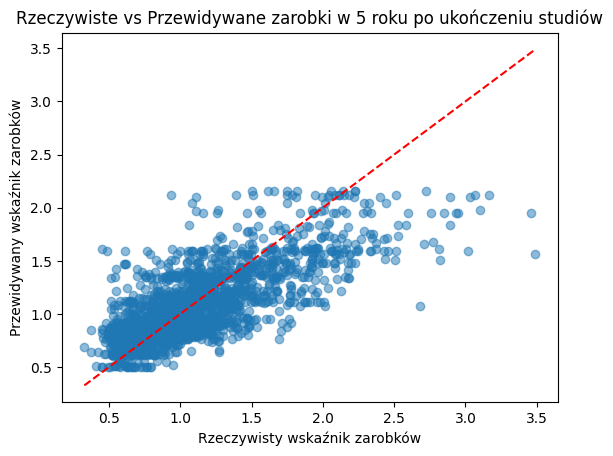

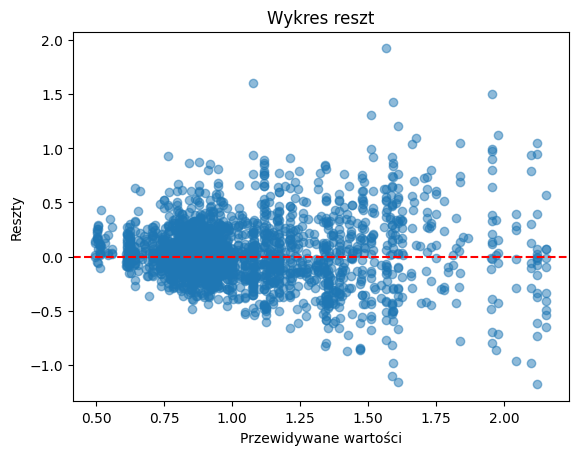

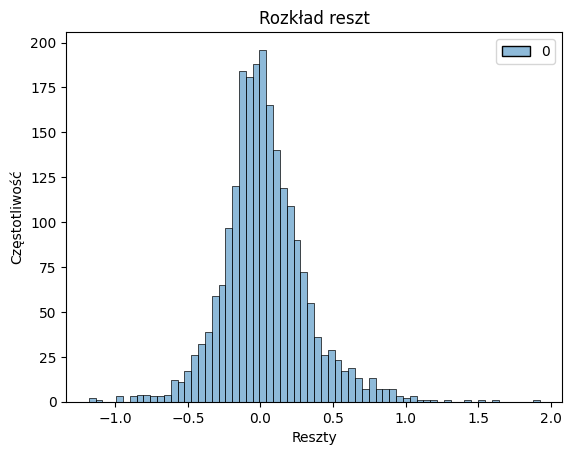

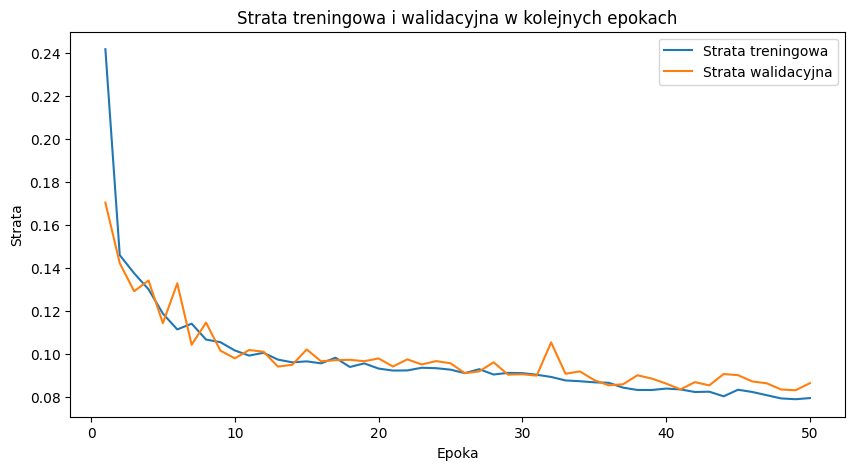

In [35]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

year = 5

# Assuming 'graduates_data' is your DataFrame loaded from a CSV or other source
# Replace this with your actual data loading code
# graduates_data = pd.read_csv('your_data.csv')

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Drop rows with missing values in specified columns
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', f'P_WWZ_P{year}']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

# List of categorical features
categorical_features = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']

# Label Encoding for categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

# Features and target variable
features = graduates_data_copy[categorical_features]
target = graduates_data_copy[f'P_WWZ_P{year}']

# Convert to tensors
X = torch.tensor(features.values, dtype=torch.float32)
y = torch.tensor(target.values, dtype=torch.float32).unsqueeze(1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Custom Dataset
class GraduatesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define your RegressionModel
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)        # Second hidden layer
        self.fc3 = nn.Linear(64, 32)         # Third hidden layer
        self.fc4 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
model = RegressionModel(input_dim=len(categorical_features))

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Create datasets
train_dataset = GraduatesDataset(X_train, y_train)
test_dataset = GraduatesDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training loop
epochs = 50  # Number of epochs
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch_x.size(0)
    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    epoch_valid_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            epoch_valid_loss += loss.item() * batch_x.size(0)
    epoch_valid_loss /= len(valid_loader.dataset)
    valid_losses.append(epoch_valid_loss)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Training Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_valid_loss:.4f}")


# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test).numpy()
    y_test_actual = y_test.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)
mape = mean_absolute_percentage_error(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title(f"Rzeczywiste vs Przewidywane zarobki w {year} roku po ukończeniu studiów")
plt.plot(
    [y_test_actual.min(), y_test_actual.max()],
    [y_test_actual.min(), y_test_actual.max()],
    'r--'
)  # Line y=x
plt.show()

residuals = y_test_actual - test_predictions
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.xlabel("Przewidywane wartości")
plt.ylabel("Reszty")
plt.title("Wykres reszt")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()


sns.histplot(residuals, kde=False)
plt.title("Rozkład reszt")
plt.xlabel("Reszty")
plt.ylabel("Częstotliwość")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()


Epoch [1/3] - Train Loss: 0.1476, Valid Loss: 0.0487
Epoch [2/3] - Train Loss: 0.0302, Valid Loss: 0.0224
Epoch [3/3] - Train Loss: 0.0191, Valid Loss: 0.0175
Test MAE: 0.0917
Test MSE: 0.0175
Test RMSE: 0.1323
Test R-squared: 0.8994
Test MAPE: 0.0998


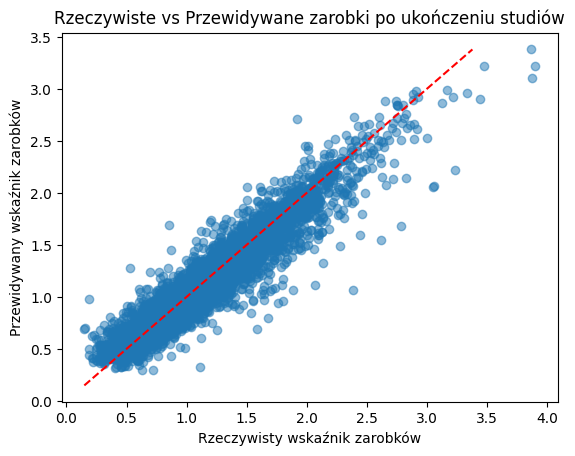

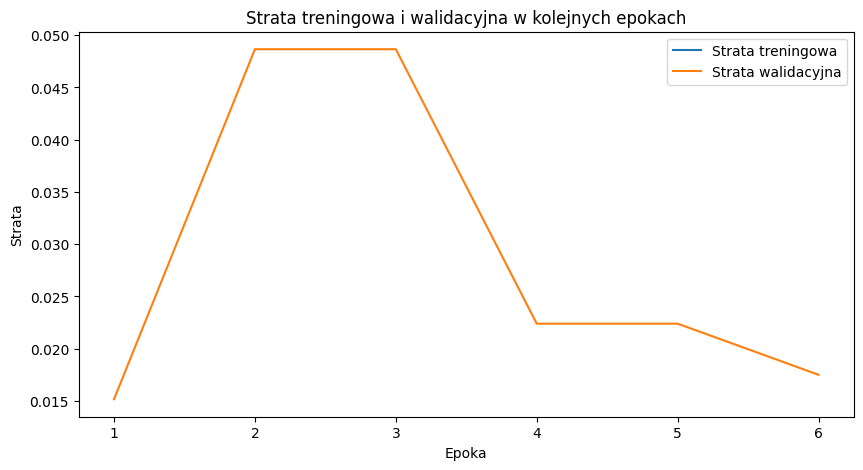

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# ============================================
# 1. Data Preparation
# ============================================
# In this example, we assume you have a DataFrame called 'graduates_data' 
# with the following columns:
#   'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
#   'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
# You mentioned that you might have them already loaded.

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Remove rows that have missing values in the key columns
required_cols = [
    'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
    'P_WWZ_P1', 'P_WWZ_P2', 'P_WWZ_P3', 'P_WWZ_P4', 'P_WWZ_P5'
]
graduates_data_copy.dropna(subset=required_cols, inplace=True)

# Encode categorical variables
categorical_cols = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

# In this example, for each row, we have 5 time steps corresponding to:
#   P_WWZ_P1 ... P_WWZ_P5
# We will build sequences of length 4 for the model to predict the next step
# (e.g., year t+1 based on year t), a so-called "many-to-many" approach in LSTM.

def build_sequences(row):
    """
    Builds a sequence of length 4 (features) and 4 targets from a row.
    
    For each time step t = 1..4:
      Input (X_t) = [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_Pt]
      Output (Y_t) = P_WWZ_P(t+1)
    
    The result is a tuple:
      - seq_input: shape (4, input_dim)
      - seq_output: shape (4,)
    """
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    # Retrieve the 5 known WWZ values: P_WWZ_P1..P_WWZ_P5
    wwz_values = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    
    seq_input = []
    seq_output = []
    
    # Build 4 time steps: from t=1 to t=4
    for t in range(4):
        year_t = t + 1
        x_t = [woj, poziom, forma, dziedz, year_t, wwz_values[t]]
        seq_input.append(x_t)
        
        # The target is the next year's WWZ -> wwz_values[t+1]
        seq_output.append(wwz_values[t + 1])
    
    return np.array(seq_input, dtype=np.float32), np.array(seq_output, dtype=np.float32)

all_sequences = []
all_targets = []

for _, row in graduates_data_copy.iterrows():
    x_seq, y_seq = build_sequences(row)
    all_sequences.append(x_seq)
    all_targets.append(y_seq)

all_sequences = np.array(all_sequences)  # shape: (N, 4, input_dim)
all_targets = np.array(all_targets)      # shape: (N, 4)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    all_sequences, all_targets, test_size=0.2, random_state=42
)

# ============================================
# 2. Dataset and DataLoader
# ============================================
class GraduatesLSTMDataset(Dataset):
    """
    A custom PyTorch Dataset for LSTM-based time series.
    """
    def __init__(self, X, y):
        # Convert numpy arrays to torch tensors
        self.X = torch.from_numpy(X)
        self.y = torch.from_numpy(y)
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_dataset = GraduatesLSTMDataset(X_train, y_train)
test_dataset  = GraduatesLSTMDataset(X_test, y_test)

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# ============================================
# 3. LSTM Model Definition
# ============================================
class LSTMModel(nn.Module):
    """
    A simple LSTM model for many-to-many prediction.
    The model outputs a value for each time step.
    """
    def __init__(self, input_dim, hidden_dim=64, num_layers=1):
        """
        Args:
            input_dim (int): Number of features at each time step.
            hidden_dim (int): Number of hidden units in the LSTM cell.
            num_layers (int): Number of stacked LSTM layers.
        """
        super(LSTMModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        # batch_first=True => input shape: (batch, seq_length, input_dim)
        self.lstm = nn.LSTM(
            input_size=input_dim,
            hidden_size=hidden_dim,
            num_layers=num_layers,
            batch_first=True
        )
        
        # Final fully-connected layer maps hidden states to 1D output
        self.fc = nn.Linear(hidden_dim, 1)
    
    def forward(self, x):
        """
        Forward pass through the LSTM.
        
        Args:
            x (Tensor): shape (batch_size, seq_length, input_dim)
        
        Returns:
            Tensor of shape (batch_size, seq_length) representing 
            predicted values at each time step.
        """
        # LSTM forward pass
        lstm_out, (h_n, c_n) = self.lstm(x)
        
        # Map each hidden state to a single output
        out = self.fc(lstm_out)  # shape: (batch_size, seq_length, 1)
        
        # Remove the last dimension
        return out.squeeze(-1)   # shape: (batch_size, seq_length)

# Define input_dim (e.g., 6: [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, t, P_WWZ_t])
input_dim = X_train.shape[2]

# Initialize model, loss function, and optimizer
model = LSTMModel(input_dim=input_dim, hidden_dim=64, num_layers=1)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# ============================================
# 4. Model Training
# ============================================
epochs = 3
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    train_loss = 0.0
    
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        
        # Forward pass
        preds = model(batch_x)  # shape: (batch_size, seq_length=4)
        
        # Compute loss
        loss = criterion(preds, batch_y)
        
        # Backprop and update
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item() * batch_x.size(0)
    
    train_loss /= len(train_loader.dataset)
    train_losses.append(valid_loss)
    
    # Optional: validate on the test set
    model.eval()
    valid_loss = 0.0
    
    with torch.no_grad():
        for batch_x, batch_y in test_loader:
            preds = model(batch_x)
            loss = criterion(preds, batch_y)
            valid_loss += loss.item() * batch_x.size(0)

    valid_loss /= len(test_loader.dataset)
    valid_losses.append(valid_loss)
    
    print(f"Epoch [{epoch+1}/{epochs}] - "
          f"Train Loss: {train_loss:.4f}, Valid Loss: {valid_loss:.4f}")

# ============================================
# 5. Evaluation on the Test Set
# ============================================
model.eval()
test_preds_list = []
test_y_list = []

with torch.no_grad():
    for batch_x, batch_y in test_loader:
        preds = model(batch_x)
        test_preds_list.append(preds)
        test_y_list.append(batch_y)

# Concatenate predictions and true values
test_preds = torch.cat(test_preds_list, dim=0).numpy()  # shape: (N_test, 4)
test_real = torch.cat(test_y_list, dim=0).numpy()       # shape: (N_test, 4)

# Calculate regression metrics
mae = mean_absolute_error(test_real.flatten(), test_preds.flatten())
mse = mean_squared_error(test_real.flatten(), test_preds.flatten())
rmse = np.sqrt(mse)
r2 = r2_score(test_real.flatten(), test_preds.flatten())
mape = mean_absolute_percentage_error(test_real.flatten(), test_preds.flatten())

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(test_real.flatten(), test_preds.flatten(), alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title(f"Rzeczywiste vs Przewidywane zarobki po ukończeniu studiów")
plt.plot(
    [test_real.flatten().min(), test_preds.flatten().max()],
    [test_real.flatten().min(), test_preds.flatten().max()],
    'r--'
)  # Line y=x
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()

# ============================================
# 6. Forecast for Future Years (e.g., 6..10)
# ============================================
# We will use "roll-out" or "iterative forecasting" to predict years beyond 5.

def rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years=5):
    """
    Iteratively generate predictions for future_years beyond the known data.
    
    Args:
        model (nn.Module): The trained LSTM model.
        known_wwz (list[float]): List of WWZ values for years 1..5.
        woj, poziom, forma, dziedz (float): Encoded categorical features.
        future_years (int): How many future years to predict (e.g., 5 => years 6..10).
    
    Returns:
        A list of predicted WWZ values for the next future_years.
    """
    model.eval()
    
    # Initialize hidden and cell states
    h = torch.zeros(model.num_layers, 1, model.hidden_dim)
    c = torch.zeros(model.num_layers, 1, model.hidden_dim)
    
    # First, "warm up" the LSTM with years 1..4 so it reaches the state for year 5
    # since we have 4 steps in the input sequence. known_wwz has 5 elements: years 1..5.
    
    for t in range(4):
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t+1, known_wwz[t]
        ]], dtype=torch.float32)
        
        # Manually run the LSTM cell to keep track of hidden states
        out, (h, c) = model.lstm(x_t, (h, c))
    
    # After this loop, LSTM is at the state corresponding to year 5
    wwz_5 = known_wwz[4]  # the known year-5 value
    future_preds = []
    prev_wwz = wwz_5
    
    # Predict future years (6..(5 + future_years)) iteratively
    for i in range(future_years):
        t_future = 5 + i
        x_t = torch.tensor([[
            woj, poziom, forma, dziedz, t_future, prev_wwz
        ]], dtype=torch.float32)
        
        out, (h, c) = model.lstm(x_t, (h, c))
        pred = model.fc(out)  # shape: (1, 1, 1)
        pred_value = pred.item()
        future_preds.append(pred_value)
        
        # Update prev_wwz for the next iteration
        prev_wwz = pred_value
    
    return future_preds

def predict_future(model, row, future_years=5):
    """
    A helper function that retrieves the known data from a row,
    then calls rollout_prediction to forecast future years.
    
    Args:
        model (nn.Module): Trained LSTM model.
        row (pd.Series): A row containing 'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
                         and 'P_WWZ_P1'..'P_WWZ_P5'.
        future_years (int): Number of future years to forecast.
    
    Returns:
        A list of forecasted WWZ values for the next 'future_years'.
    """
    model.eval()
    
    known_wwz = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']
    
    return rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years)

# Example usage of future prediction:
example_row = graduates_data_copy.iloc[0]
# predicted_next_5 = predict_future(model, example_row, future_years=5)

# print("Predictions for years 6..10:", predicted_next_5)


In [46]:
import torch
import pandas as pd
import numpy as np

def test_model_multiple_years(
    model,
    base_features,
    label_encoders,
    real_data,
    years=range(1, 11),
    target_pattern="P_WWZ_P{}"
):
    """
    Generate predictions for multiple years after graduation (e.g., 1..10) using a trained PyTorch model.
    It produces a pandas DataFrame with columns: [Year, Predicted, Median, Diff(%)].

    Args:
        model (nn.Module): Trained PyTorch regression model that accepts features
                           [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, Year].
        base_features (dict): A dictionary containing the base input features, for example:
            {
                'P_WOJ': 0,
                'P_POZIOM': 1,
                'P_FORMA': 1,
                'Dziedzina': 4
            }
          These are categorical or numeric values BEFORE encoding (the same as you pass to label_encoders).
          The 'Year' feature will be appended programmatically for each iteration.
        label_encoders (dict): Dictionary of fitted LabelEncoders for the categorical features.
                               Keys match the column names (e.g., 'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina').
        real_data (pd.DataFrame): A DataFrame containing actual reference values for each
                                  year in columns named like 'P_WWZ_P1', 'P_WWZ_P2', etc.
                                  This can be filtered to the same subset of:
                                  [P_WOJ, P_POZIOM, P_FORMA, Dziedzina].
        years (iterable): The list or range of years for which to generate predictions (default: 1..10).
        target_pattern (str): A format string for the real_data columns, e.g. "P_WWZ_P{}".

    Returns:
        pd.DataFrame: A DataFrame with columns:
            - 'Year': The year after graduation (e.g., 1..10).
            - 'Predicted': The predicted value from the model.
            - 'Median': The median from the real_data (if the column exists and subset is not empty).
            - 'Diff(%)': The percentage difference ( (Predicted - Median) / Median * 100 ) if Median != 0.
    """
    model.eval()

    # 1) Encode the base features (woj, poziom, forma, dziedzina).
    #    We'll store them in a list, excluding 'Year' because we'll add it dynamically below.
    encoded_base = []
    for feature, value in base_features.items():
        if feature in label_encoders:
            encoded_value = label_encoders[feature].transform([value])[0]
        else:
            encoded_value = value
        encoded_base.append(encoded_value)

    # 2) We will store our results in a list of dictionaries, then convert to DataFrame.
    results = []

    for year in years:
        # Build the input vector. The model expects 5 features if it was trained with
        # an additional 'Year' dimension: [P_WOJ, P_POZIOM, P_FORMA, Dziedzina, Year].
        input_vector = encoded_base + [year]

        # Convert to a PyTorch tensor of shape (batch_size=1, input_dim=5).
        input_tensor = torch.tensor([input_vector], dtype=torch.float32)

        # 3) Inference (prediction)
        with torch.no_grad():
            # The model likely outputs a shape (1,1) => we take .item() to get a scalar
            predicted_val = model(input_tensor).item()

        # 4) Try to find the corresponding real median for this year in real_data.
        #    The column name is something like 'P_WWZ_P1' or 'P_WWZ_P2' => we use target_pattern.
        col_name = target_pattern.format(year)
        if col_name in real_data.columns:
            # Filter real_data to match the same subset for (P_WOJ, P_POZIOM, P_FORMA, Dziedzina)
            subset = real_data.copy()
            for f, v in base_features.items():
                subset = subset[subset[f] == v]

            if not subset.empty:
                real_median = subset[col_name].median()
            else:
                real_median = np.nan
        else:
            real_median = np.nan

        # 5) Calculate difference in % if possible
        if real_median and not np.isnan(real_median) and real_median != 0:
            diff_pct = (predicted_val - real_median) / real_median * 100
        else:
            diff_pct = np.nan

        # 6) Append to results
        results.append({
            "Year": year,
            "Predicted": round(predicted_val, 4),
            "Median": (round(real_median, 4)
                       if not np.isnan(real_median) else np.nan),
            "Diff(%)": (round(diff_pct, 2)
                        if not np.isnan(diff_pct) else np.nan)
        })

    # 7) Convert to a pandas DataFrame
    df_results = pd.DataFrame(results)
    return df_results


# ----------------------------------------------------------------------------
# Example Usage:
# ----------------------------------------------------------------------------
# Suppose we define our "base_features" as follows:
example_input = {
    'P_WOJ': 0,      # Example: some voivodeship code
    'P_POZIOM': 1,   # Example: some study level
    'P_FORMA': 1,    # Example: study form
    'Dziedzina': 4   # Example: field of study
}

# We'll predict for years 1..10. The model presumably was trained to handle an additional Year input.
df_predictions = test_model_multiple_years(
    model=model,
    base_features=example_input,
    label_encoders=label_encoders,  # your fitted encoders
    real_data=graduates_data,       # your actual data for reference
    years=range(1, 11)              # predict for 1..10 years after graduation
)

print(df_predictions)

# This will print a table like:
#    Year  Predicted  Median  Diff(%)
# 0     1     1.2345  1.2100   2.03
# 1     2     1.3000  1.2500   4.00
# ...
# 9    10     1.9000     NaN    NaN  <-- if no real data is available for year=10


RuntimeError: input.size(-1) must be equal to input_size. Expected 6, got 5

In [45]:
import torch

def rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years=5):
    """
    Iteratively generate predictions for future_years beyond the known data.

    Args:
        model (nn.Module): The trained LSTM model (batch_first=True).
        known_wwz (list[float]): List of WWZ values for years 1..5.
        woj, poziom, forma, dziedz (float): Encoded categorical features.
        future_years (int): How many future years to predict (e.g., 5 => years 6..10).

    Returns:
        A list of predicted WWZ values for the next future_years (e.g., 6..10).
    """
    model.eval()

    # Initialize hidden and cell states.
    # Shape: (num_layers, batch_size=1, hidden_dim)
    h = torch.zeros(model.num_layers, 1, model.hidden_dim)
    c = torch.zeros(model.num_layers, 1, model.hidden_dim)

    # Warm-up the LSTM with the first 4 years to reach the state corresponding to year 5.
    # known_wwz has 5 elements => years 1..5.
    for t in range(4):
        # We create an input of shape (batch_size=1, seq_len=1, input_dim=6).
        # Because batch_first=True, it should be (1, 1, 6).
        x_t = torch.tensor([[
            [woj, poziom, forma, dziedz, (t + 1), known_wwz[t]]
        ]], dtype=torch.float32)
        # x_t.shape => (1, 1, 6)

        out, (h, c) = model.lstm(x_t, (h, c))
        # No need to pass through model.fc here because we're just "warming up"
        # to get the correct hidden state for year 5.

    # After the loop, the LSTM's hidden state corresponds to year 5
    wwz_5 = known_wwz[4]  # the known value for year 5
    future_preds = []
    prev_wwz = wwz_5

    # Predict future years (6..(5 + future_years)) iteratively.
    for i in range(future_years):
        t_future = 5 + i
        x_t = torch.tensor([[
            [woj, poziom, forma, dziedz, t_future, prev_wwz]
        ]], dtype=torch.float32)
        # x_t.shape => (1, 1, 6)

        out, (h, c) = model.lstm(x_t, (h, c))   # out.shape => (1, 1, hidden_dim)
        pred = model.fc(out)                   # pred.shape => (1, 1, 1)
        pred_value = pred.item()               # scalar
        future_preds.append(pred_value)

        # Use the new prediction as input for the next time step
        prev_wwz = pred_value

    return future_preds


def predict_future(model, row, future_years=5):
    """
    A helper function that retrieves the known data from a row,
    then calls rollout_prediction to forecast future years.

    Args:
        model (nn.Module): Trained LSTM model (with batch_first=True).
        row (pd.Series): A row containing 'P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina',
                         and 'P_WWZ_P1'..'P_WWZ_P5'.
        future_years (int): Number of future years to forecast.

    Returns:
        A list of forecasted WWZ values for the next 'future_years'.
    """
    model.eval()

    known_wwz = [
        row['P_WWZ_P1'],
        row['P_WWZ_P2'],
        row['P_WWZ_P3'],
        row['P_WWZ_P4'],
        row['P_WWZ_P5']
    ]
    woj = row['P_WOJ']
    poziom = row['P_POZIOM']
    forma = row['P_FORMA']
    dziedz = row['Dziedzina']

    return rollout_prediction(model, known_wwz, woj, poziom, forma, dziedz, future_years)


# Example usage:
example_row = graduates_data_copy.iloc[0]
predicted_next_5 = predict_future(model, example_row, future_years=5)
print("Predictions for years 6..10:", predicted_next_5)


Predictions for years 6..10: [0.902431309223175, 1.0098835229873657, 1.1153384447097778, 1.2100363969802856, 1.2859350442886353]


Predicted salary: 2.0400
Median: 1.69
Diff: 20.71%


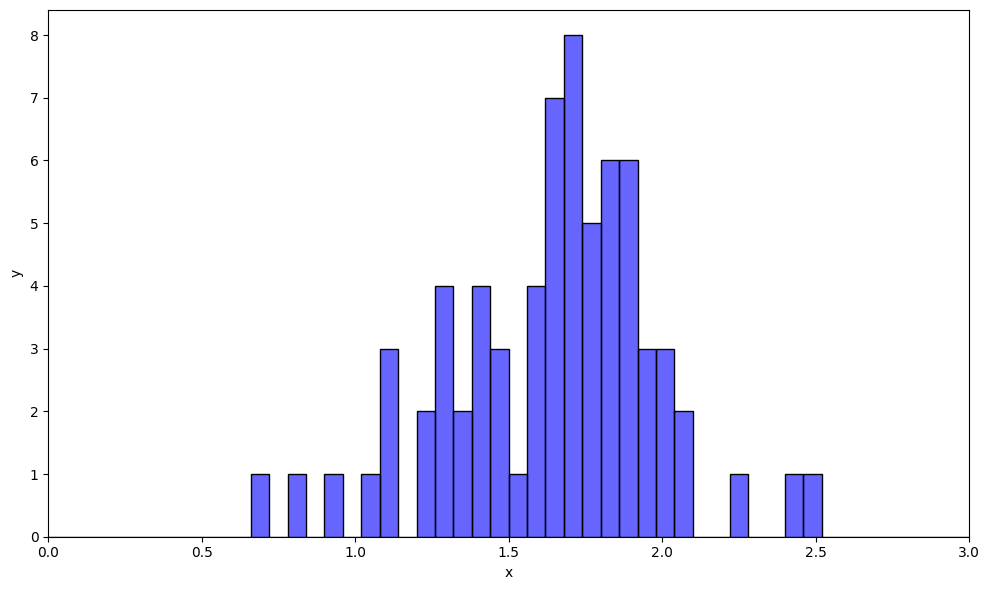

In [38]:
num_bins = 50
x_range = (0, 3)

voivodship_dict = {
    2: "Dolnośląskie",
    4: "Kujawsko-Pomorskie",
    6: "Lubelskie",
    8: "Lubuskie",
    10: "Łódzkie",
    12: "Małopolskie",
    14: "Mazowieckie",
    16: "Opolskie",
    18: "Podkarpackie",
    20: "Podlaskie",
    22: "Pomorskie",
    24: "Śląskie",
    26: "Świętokrzyskie",
    28: "Warmińsko-Mazurskie",
    30: "Wielkopolskie",
    32: "Zachodniopomorskie"
}


real_data = graduates_data.copy()

wojewodztwo = 0
forma = 1

poziom = 1
dziedzina = 4

real_data = real_data[real_data['P_WOJ'] == wojewodztwo]
real_data = real_data[real_data['P_POZIOM'] == poziom]
real_data = real_data[real_data['P_FORMA'] == forma]
real_data = real_data[real_data['Dziedzina'] == dziedzina]

median_value = round(real_data['P_WWZ_P2'].median(), 2)
# mean_value = real_data['P_WWZ_P2'].mean()





def test_model(model, input_features, label_encoders):
    """
    Test the trained PyTorch model with a single set of input features.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        input_features (dict): Input features as a dictionary with keys:
            ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']
        label_encoders (dict): Dictionary of LabelEncoders for categorical features.

    Returns:
        float: Predicted value for `P_WWZ_P2`.
    """
    # Ensure the model is in evaluation mode
    model.eval()

    # Encode categorical input features
    encoded_features = []
    for feature, value in input_features.items():
        if feature in label_encoders:
            encoded_value = label_encoders[feature].transform([value])[0]
        else:
            encoded_value = value
        encoded_features.append(encoded_value)

    # Convert encoded features to a PyTorch tensor
    input_tensor = torch.tensor([encoded_features], dtype=torch.float32)

    # Make a prediction
    with torch.no_grad():
        prediction = model(input_tensor).numpy()[0, 0]

    return prediction


# Example usage:
example_input = {
    'P_WOJ': wojewodztwo,  # Województwo: Lubelskie
    'P_POZIOM': poziom,  # Poziom studiów: Magisterskie
    'P_FORMA': forma,  # Forma studiów: Stacjonarne
    'Dziedzina': dziedzina  # Dziedzina: Nauki ścisłe i przyrodnicze
}

# Predict `P_WWZ_P2`
predicted_value = round(test_model(model, example_input, label_encoders), 2)

diff = round(((predicted_value - median_value)/median_value) * 100, 2)

print(f"Predicted salary: {predicted_value:.4f}")
print(f"Median: {median_value}")
print(f"Diff: {diff}%")


plt.figure(figsize=(10, 6))
sns.histplot(
    data=real_data, 
    x='P_WWZ_P2', 
    # weights='P_N', 
    bins=num_bins, 
    binrange=x_range, 
    kde=False, 
    color='blue',
    edgecolor="black", 
    alpha=0.6, 
    stat="count"
)
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(x_range)
plt.tight_layout()
plt.show()

/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Training Loss: 0.1159, Validation Loss: 0.0835
Epoch 2/100, Training Loss: 0.0853, Validation Loss: 0.0752
Validation loss decreased from 0.0835 to 0.0752.
Epoch 3/100, Training Loss: 0.0771, Validation Loss: 0.0660
Validation loss decreased from 0.0752 to 0.0660.
Epoch 4/100, Training Loss: 0.0706, Validation Loss: 0.0637
Validation loss decreased from 0.0660 to 0.0637.
Epoch 5/100, Training Loss: 0.0669, Validation Loss: 0.0584
Validation loss decreased from 0.0637 to 0.0584.
Epoch 6/100, Training Loss: 0.0643, Validation Loss: 0.0622
EarlyStopping counter: 1 out of 5
Epoch 7/100, Training Loss: 0.0628, Validation Loss: 0.0581
Validation loss decreased from 0.0584 to 0.0581.
Epoch 8/100, Training Loss: 0.0622, Validation Loss: 0.0658
EarlyStopping counter: 1 out of 5
Epoch 9/100, Training Loss: 0.0618, Validation Loss: 0.0559
Validation loss decreased from 0.0581 to 0.0559.
Epoch 10/100, Training Loss: 0.0614, Validation Loss: 0.0554
Validation loss decreased from 0.0559

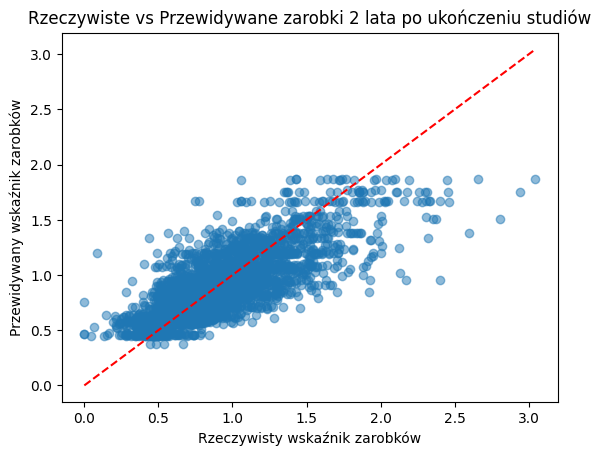

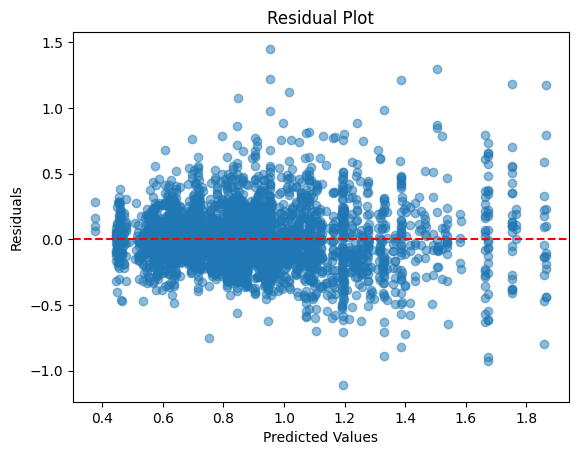

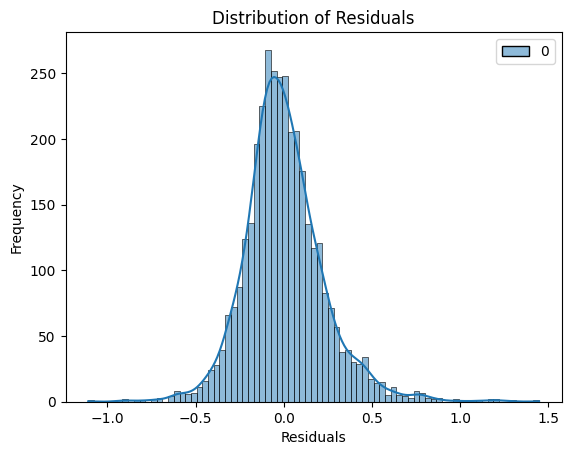

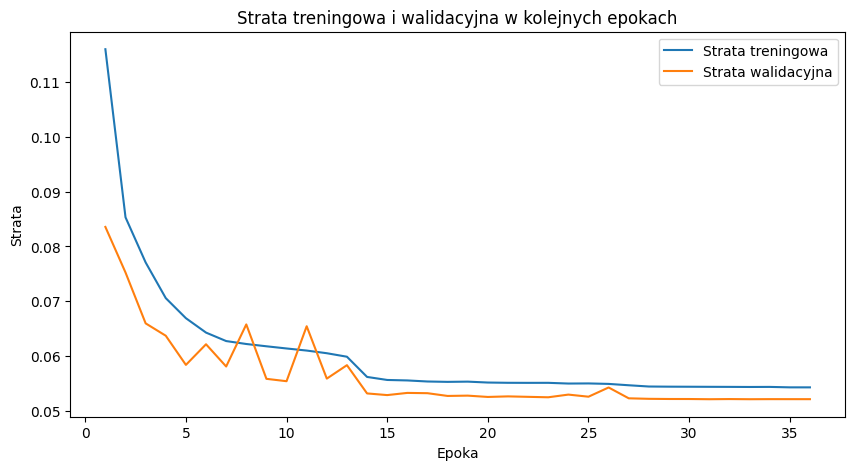

In [10]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'graduates_data' is your DataFrame loaded from a CSV or other source
# Replace this with your actual data loading code
# graduates_data = pd.read_csv('your_data.csv')

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Drop rows with missing values in specified columns
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

# List of categorical features
categorical_features = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']

# Label Encoding for categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

# Features and target variable
features = graduates_data_copy[categorical_features]
target = graduates_data_copy['P_WWZ_P2']

# Convert to tensors
X = torch.tensor(features.values, dtype=torch.float32)
y = torch.tensor(target.values, dtype=torch.float32).unsqueeze(1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Custom Dataset
class GraduatesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Define your RegressionModel
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)        # Second hidden layer
        self.fc3 = nn.Linear(64, 32)         # Third hidden layer
        self.fc4 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
model = RegressionModel(input_dim=len(categorical_features))

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, verbose=True)

# Early stopping
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss:
            if self.verbose and self.best_loss is not None:
                print(f"Validation loss decreased from {self.best_loss:.4f} to {val_loss:.4f}.")
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

early_stopping = EarlyStopping(patience=5, verbose=True)

# Create datasets
train_dataset = GraduatesDataset(X_train, y_train)
test_dataset = GraduatesDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Training loop
epochs = 100  # Number of epochs
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch_x.size(0)
    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    epoch_valid_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            epoch_valid_loss += loss.item() * batch_x.size(0)
    epoch_valid_loss /= len(valid_loader.dataset)
    valid_losses.append(epoch_valid_loss)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Training Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_valid_loss:.4f}")

    # Step the scheduler
    scheduler.step(epoch_valid_loss)

    # Early stopping
    early_stopping(epoch_valid_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test).numpy()
    y_test_actual = y_test.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)
mape = mean_absolute_percentage_error(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title("Rzeczywiste vs Przewidywane zarobki 2 lata po ukończeniu studiów")
plt.plot(
    [y_test_actual.min(), y_test_actual.max()],
    [y_test_actual.min(), y_test_actual.max()],
    'r--'
)  # Line y=x
plt.show()

residuals = y_test_actual - test_predictions
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()


/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/100, Training Loss: 0.2111, Validation Loss: 0.0977
Epoch 2/100, Training Loss: 0.1199, Validation Loss: 0.0860
Validation loss decreased from 0.0977 to 0.0860.
Epoch 3/100, Training Loss: 0.1067, Validation Loss: 0.0812
Validation loss decreased from 0.0860 to 0.0812.
Epoch 4/100, Training Loss: 0.0991, Validation Loss: 0.0729
Validation loss decreased from 0.0812 to 0.0729.
Epoch 5/100, Training Loss: 0.0940, Validation Loss: 0.0682
Validation loss decreased from 0.0729 to 0.0682.
Epoch 6/100, Training Loss: 0.0907, Validation Loss: 0.0736
EarlyStopping counter: 1 out of 5
Epoch 7/100, Training Loss: 0.0857, Validation Loss: 0.0675
Validation loss decreased from 0.0682 to 0.0675.
Epoch 8/100, Training Loss: 0.0833, Validation Loss: 0.0646
Validation loss decreased from 0.0675 to 0.0646.
Epoch 9/100, Training Loss: 0.0825, Validation Loss: 0.0711
EarlyStopping counter: 1 out of 5
Epoch 10/100, Training Loss: 0.0808, Validation Loss: 0.0653
EarlyStopping counter: 2 out of 5
Epo

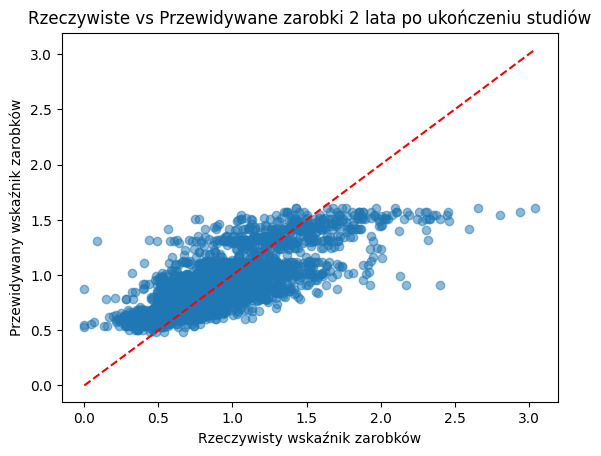

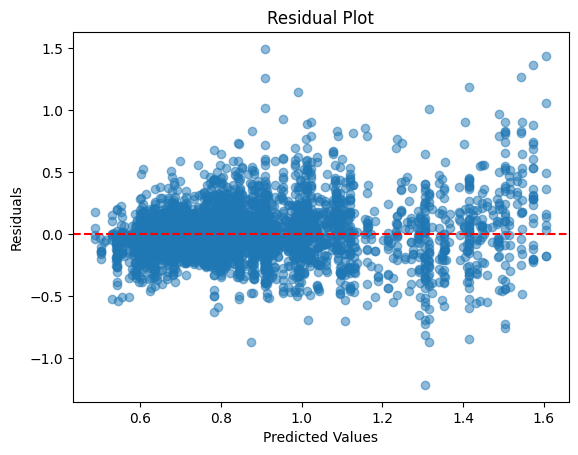

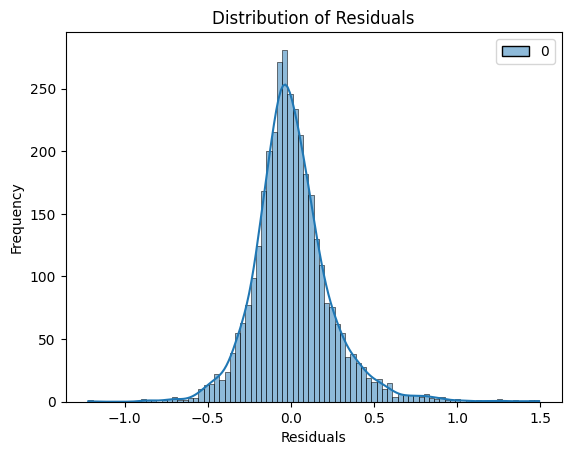

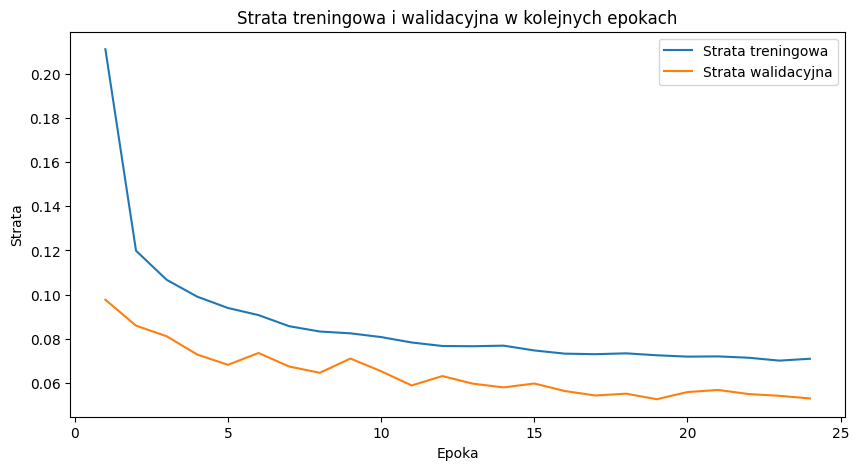

In [49]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

# Assuming 'graduates_data' is your DataFrame loaded from a CSV or other source
# Replace this with your actual data loading code
# graduates_data = pd.read_csv('your_data.csv')

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Drop rows with missing values in specified columns
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

# List of categorical features
categorical_features = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']

# Label Encoding for categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

# Features and target variable
features = graduates_data_copy[categorical_features]
target = graduates_data_copy['P_WWZ_P2']

# Convert to tensors
X = torch.tensor(features.values, dtype=torch.long)
y = torch.tensor(target.values, dtype=torch.float32).unsqueeze(1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

class GraduatesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


embedding_sizes = []
for col in categorical_features:
    num_categories = graduates_data_copy[col].nunique()
    embedding_dim = int(min(50, (num_categories + 1) // 2))
    embedding_sizes.append((num_categories, embedding_dim))

class RegressionModelWithEmbeddings(nn.Module):
    def __init__(self, embedding_sizes):
        super(RegressionModelWithEmbeddings, self).__init__()
        self.embeddings = nn.ModuleList(
            [nn.Embedding(categories, size) for categories, size in embedding_sizes]
        )
        total_embedding_size = sum([size for _, size in embedding_sizes])
        self.dropout = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm1d(total_embedding_size)
        self.fc1 = nn.Linear(total_embedding_size, 128)
        self.bn2 = nn.BatchNorm1d(128)
        self.fc2 = nn.Linear(128, 64)
        self.bn3 = nn.BatchNorm1d(64)
        self.fc3 = nn.Linear(64, 32)
        self.bn4 = nn.BatchNorm1d(32)
        self.fc4 = nn.Linear(32, 1)

    def forward(self, x_cat):
        x = [
            emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)
        ]  # List of embeddings
        x = torch.cat(x, dim=1)  # Concatenate embeddings
        x = self.bn1(x)
        x = self.dropout(x)
        x = F.relu(self.bn2(self.fc1(x)))
        x = self.dropout(x)
        x = F.relu(self.bn3(self.fc2(x)))
        x = self.dropout(x)
        x = F.relu(self.bn4(self.fc3(x)))
        x = self.fc4(x)
        return x
    
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss:
            if self.verbose and self.best_loss is not None:
                print(f"Validation loss decreased from {self.best_loss:.4f} to {val_loss:.4f}.")
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# Initialize the model
model = RegressionModelWithEmbeddings(embedding_sizes)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, verbose=True)

# Early stopping
early_stopping = EarlyStopping(patience=5, verbose=True)

# Create datasets
train_dataset = GraduatesDataset(X_train, y_train)
test_dataset = GraduatesDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

epochs = 100  # Increase epochs for better training
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch_x.size(0)
    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    epoch_valid_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            epoch_valid_loss += loss.item() * batch_x.size(0)
    epoch_valid_loss /= len(valid_loader.dataset)
    valid_losses.append(epoch_valid_loss)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Training Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_valid_loss:.4f}")

    # Step the scheduler
    scheduler.step(epoch_valid_loss)

    # Early stopping
    early_stopping(epoch_valid_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test).numpy()
    y_test_actual = y_test.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)
mape = mean_absolute_percentage_error(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title("Rzeczywiste vs Przewidywane zarobki 2 lata po ukończeniu studiów")
plt.plot(
    [y_test_actual.min(), y_test_actual.max()],
    [y_test_actual.min(), y_test_actual.max()],
    'r--'
)  # Line y=x
plt.show()

residuals = y_test_actual - test_predictions
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()



In [52]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,
    mean_absolute_percentage_error,
)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch.nn.functional as F

# Assuming 'graduates_data' is your DataFrame loaded from a CSV or other source
# Replace this with your actual data loading code
# graduates_data = pd.read_csv('your_data.csv')

graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 5]

# Drop rows with missing values in specified columns
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

# List of categorical features
categorical_features = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']

# Label Encoding for categorical variables
label_encoders = {}
for col in categorical_features:
    le = LabelEncoder()
    graduates_data_copy[col] = le.fit_transform(graduates_data_copy[col])
    label_encoders[col] = le

# Features and target variable
features = graduates_data_copy[categorical_features]
target = graduates_data_copy['P_WWZ_P2']

# Convert to tensors
X = torch.tensor(features.values, dtype=torch.long)
y = torch.tensor(target.values, dtype=torch.float32).unsqueeze(1)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

class GraduatesDataset(Dataset):
    def __init__(self, X, y):
        self.X = X
        self.y = y

    def __len__(self):
        return self.X.size(0)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


embedding_sizes = []
for col in categorical_features:
    num_categories = graduates_data_copy[col].nunique()
    embedding_dim = int(min(50, (num_categories + 1) // 2))
    embedding_sizes.append((num_categories, embedding_dim))

# class RegressionModelWithEmbeddings(nn.Module):
#     def __init__(self, embedding_sizes):
#         super(RegressionModelWithEmbeddings, self).__init__()
#         self.embeddings = nn.ModuleList(
#             [nn.Embedding(categories, size) for categories, size in embedding_sizes]
#         )
#         total_embedding_size = sum([size for _, size in embedding_sizes])
#         self.dropout = nn.Dropout(0.5)
#         self.bn1 = nn.BatchNorm1d(total_embedding_size)
#         self.fc1 = nn.Linear(total_embedding_size, 128)
#         self.bn2 = nn.BatchNorm1d(128)
#         self.fc2 = nn.Linear(128, 64)
#         self.bn3 = nn.BatchNorm1d(64)
#         self.fc3 = nn.Linear(64, 32)
#         self.bn4 = nn.BatchNorm1d(32)
#         self.fc4 = nn.Linear(32, 1)

#     def forward(self, x_cat):
#         x = [
#             emb(x_cat[:, i]) for i, emb in enumerate(self.embeddings)
#         ]  # List of embeddings
#         x = torch.cat(x, dim=1)  # Concatenate embeddings
#         x = self.bn1(x)
#         x = self.dropout(x)
#         x = F.relu(self.bn2(self.fc1(x)))
#         x = self.dropout(x)
#         x = F.relu(self.bn3(self.fc2(x)))
#         x = self.dropout(x)
#         x = F.relu(self.bn4(self.fc3(x)))
#         x = self.fc4(x)
#         return x

# Define the deep neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)  # First hidden layer
        self.fc2 = nn.Linear(128, 64)        # Second hidden layer
        self.fc3 = nn.Linear(64, 32)         # Third hidden layer
        self.fc4 = nn.Linear(32, 1)          # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
class EarlyStopping:
    def __init__(self, patience=5, verbose=False):
        self.patience = patience
        self.verbose = verbose
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None or val_loss < self.best_loss:
            if self.verbose and self.best_loss is not None:
                print(f"Validation loss decreased from {self.best_loss:.4f} to {val_loss:.4f}.")
            self.best_loss = val_loss
            self.counter = 0
        else:
            self.counter += 1
            if self.verbose:
                print(f"EarlyStopping counter: {self.counter} out of {self.patience}")
            if self.counter >= self.patience:
                self.early_stop = True

# Initialize the model
# model = RegressionModelWithEmbeddings(embedding_sizes)
model = RegressionModel(input_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=2, verbose=True)

# Early stopping
early_stopping = EarlyStopping(patience=5, verbose=True)

# Create datasets
train_dataset = GraduatesDataset(X_train, y_train)
test_dataset = GraduatesDataset(X_test, y_test)

# Create data loaders
batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

epochs = 100  # Increase epochs for better training
train_losses = []
valid_losses = []

for epoch in range(epochs):
    model.train()
    epoch_train_loss = 0.0
    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item() * batch_x.size(0)
    epoch_train_loss /= len(train_loader.dataset)
    train_losses.append(epoch_train_loss)

    # Validation phase
    model.eval()
    epoch_valid_loss = 0.0
    with torch.no_grad():
        for batch_x, batch_y in valid_loader:
            outputs = model(batch_x)
            loss = criterion(outputs, batch_y)
            epoch_valid_loss += loss.item() * batch_x.size(0)
    epoch_valid_loss /= len(valid_loader.dataset)
    valid_losses.append(epoch_valid_loss)

    print(f"Epoch {epoch+1}/{epochs}, "
          f"Training Loss: {epoch_train_loss:.4f}, "
          f"Validation Loss: {epoch_valid_loss:.4f}")

    # Step the scheduler
    scheduler.step(epoch_valid_loss)

    # Early stopping
    early_stopping(epoch_valid_loss)
    if early_stopping.early_stop:
        print("Early stopping")
        break

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test).numpy()
    y_test_actual = y_test.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)
mape = mean_absolute_percentage_error(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")
print(f"Test MAPE: {mape:.4f}")

plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Rzeczywisty wskaźnik zarobków")
plt.ylabel("Przewidywany wskaźnik zarobków")
plt.title("Rzeczywiste vs Przewidywane zarobki 2 lata po ukończeniu studiów")
plt.plot(
    [y_test_actual.min(), y_test_actual.max()],
    [y_test_actual.min(), y_test_actual.max()],
    'r--'
)  # Line y=x
plt.show()

residuals = y_test_actual - test_predictions
plt.scatter(test_predictions, residuals, alpha=0.5)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

sns.histplot(residuals, kde=True)
plt.title("Distribution of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

plt.figure(figsize=(10, 5))
plt.plot(range(1, len(train_losses) + 1), train_losses, label='Strata treningowa')
plt.plot(range(1, len(valid_losses) + 1), valid_losses, label='Strata walidacyjna')
plt.xlabel("Epoka")
plt.ylabel("Strata")
plt.title("Strata treningowa i walidacyjna w kolejnych epokach")
plt.legend()
plt.show()



/home/jkskw/git/ela_analysis/venv/lib/python3.12/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


RuntimeError: mat1 and mat2 must have the same dtype, but got Long and Float

In [50]:
from torchviz import make_dot

# Poprawiona próbka danych wejściowych
sample_input = torch.randn(1, input_dim)  # Jeden próbny przykład z odpowiednim wymiarem

# Wykonanie przejścia w modelu
sample_output = model(sample_input)

# Generowanie wizualizacji
dot = make_dot(sample_output, params=dict(model.named_parameters()))

# Dodanie atrybutów do poprawy czytelności
dot.attr(rankdir='TB', size="10,10", dpi="300")  # Zwiększenie rozdzielczości wykresu
dot.node_attr.update(fontsize='12')  # Zwiększenie rozmiaru czcionki


dot.render("model_architecture_test", format="png")  # Zapis jako PDF


RuntimeError: Expected tensor for argument #1 'indices' to have one of the following scalar types: Long, Int; but got torch.FloatTensor instead (while checking arguments for embedding)

In [9]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Check for GPU availability
# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
# print(f"Using device: {device}")

# Define the predict_salary function
def predict_salary(model, input_features, scaler):
    """
    Predicts salary using the trained PyTorch model.

    Args:
        model (torch.nn.Module): Trained PyTorch model.
        input_features (list or dict): Input features in the order:
            ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']

    Returns:
        float: Predicted salary.
    """
    # Convert input features to a NumPy array if not already
    if isinstance(input_features, dict):
        input_values = [input_features[key] for key in input_features.keys()]
    else:
        input_values = input_features

    # Scale the input features
    input_values_scaled = scaler.transform([input_values])

    # Convert to PyTorch tensor and move to the same device as the model
    input_tensor = torch.tensor(input_values_scaled, dtype=torch.float32)

    # Make prediction
    model.eval()
    with torch.no_grad():
        predicted_salary = model(input_tensor).cpu().numpy()[0, 0]

    return predicted_salary


# Corrected example input (exclude 'P_ME_ZAR' because it's the target variable)
example_input = {

    'P_WOJ': 6, 
    'P_POZIOM': 1,  
    'P_FORMA': 0,  
    'Dziedzina': 3 
}

# Predict salary
predicted_salary = predict_salary(model_1, example_input, scaler)
print(f"Predicted salary: {predicted_salary:.4f} x Median Salary")


NameError: name 'model_1' is not defined

Epoch 1/50, Training Loss: 0.1994, Validation Loss: 0.1065
Epoch 2/50, Training Loss: 0.1110, Validation Loss: 0.0931
Epoch 3/50, Training Loss: 0.1008, Validation Loss: 0.0971
Epoch 4/50, Training Loss: 0.0917, Validation Loss: 0.0893
Epoch 5/50, Training Loss: 0.0890, Validation Loss: 0.0793
Epoch 6/50, Training Loss: 0.0867, Validation Loss: 0.0750
Epoch 7/50, Training Loss: 0.0846, Validation Loss: 0.0732
Epoch 8/50, Training Loss: 0.0839, Validation Loss: 0.0731
Epoch 9/50, Training Loss: 0.0813, Validation Loss: 0.0718
Epoch 10/50, Training Loss: 0.0813, Validation Loss: 0.0792
Epoch 11/50, Training Loss: 0.0820, Validation Loss: 0.0712
Epoch 12/50, Training Loss: 0.0798, Validation Loss: 0.0738
Epoch 13/50, Training Loss: 0.0803, Validation Loss: 0.0791
Epoch 14/50, Training Loss: 0.0796, Validation Loss: 0.0781
Epoch 15/50, Training Loss: 0.0794, Validation Loss: 0.0725
Epoch 16/50, Training Loss: 0.0776, Validation Loss: 0.0750
Epoch 17/50, Training Loss: 0.0770, Validation Lo

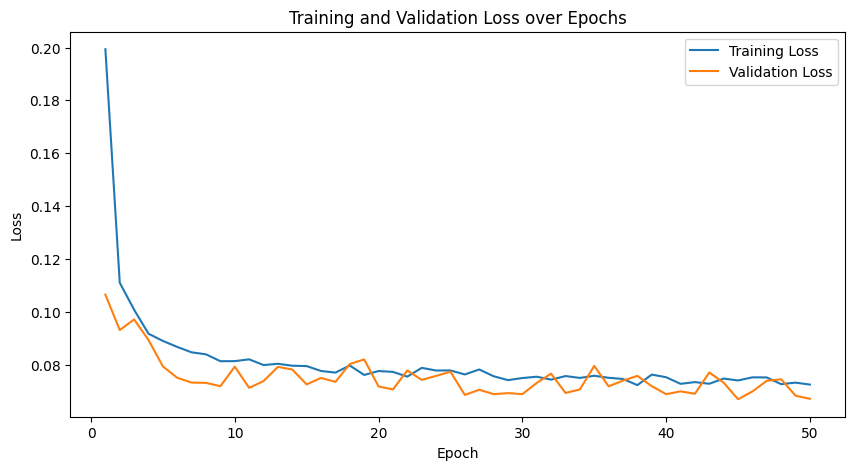

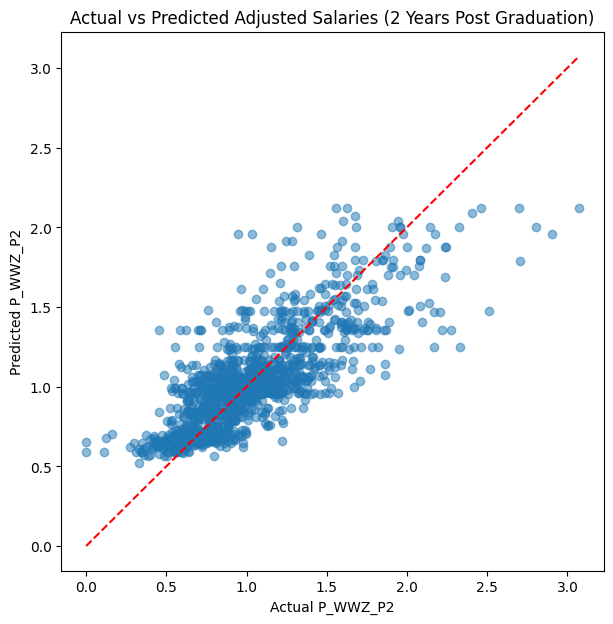

In [124]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Start with your given code
graduates_data_copy = graduates_data.copy()
graduates_data_copy = graduates_data_copy[graduates_data_copy['Dziedzina'] != 4]
columns_to_check = ['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina', 'P_WWZ_P2']
graduates_data_copy = graduates_data_copy.dropna(subset=columns_to_check)

features = graduates_data_copy[['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina']]
target = graduates_data_copy['P_WWZ_P2']

# One-hot encode categorical variables
features = pd.get_dummies(features, columns=['P_WOJ', 'P_POZIOM', 'P_FORMA', 'Dziedzina'])

# Convert DataFrame to numpy array
X = features.values
y = target.values

# Split the data into training, validation, and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(
    X, y, test_size=0.15, random_state=42
)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.1765, random_state=42
)  # 0.1765 * 0.85 ≈ 0.15

# Convert the data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the neural network model
class RegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(RegressionModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 64)
        self.bn1 = nn.BatchNorm1d(64)
        self.fc2 = nn.Linear(64, 32)
        self.bn2 = nn.BatchNorm1d(32)
        self.fc3 = nn.Linear(32, 16)
        self.fc4 = nn.Linear(16, 1)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = torch.relu(self.bn1(self.fc1(x)))
        x = self.dropout(x)
        x = torch.relu(self.bn2(self.fc2(x)))
        x = self.dropout(x)
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x

# Initialize the model
input_dim = X_train_tensor.shape[1]
model = RegressionModel(input_dim)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training loop with validation
epochs = 50
batch_size = 32
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    permutation = torch.randperm(X_train_tensor.size(0))
    epoch_loss = 0.0

    for i in range(0, X_train_tensor.size(0), batch_size):
        indices = permutation[i:i+batch_size]
        batch_x, batch_y = X_train_tensor[indices], y_train_tensor[indices]

        # Zero the parameter gradients
        optimizer.zero_grad()

        # Forward pass
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)

        # Backward pass and optimize
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

    # Calculate average training loss
    avg_train_loss = epoch_loss / (X_train_tensor.size(0) / batch_size)
    train_losses.append(avg_train_loss)

    # Validation loss
    model.eval()
    with torch.no_grad():
        val_outputs = model(X_val_tensor)
        val_loss = criterion(val_outputs, y_val_tensor)
        val_losses.append(val_loss.item())

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {avg_train_loss:.4f}, Validation Loss: {val_loss.item():.4f}")

# Evaluate the model on the test set
model.eval()
with torch.no_grad():
    test_predictions = model(X_test_tensor).numpy()
    y_test_actual = y_test_tensor.numpy()

# Calculate regression metrics
mae = mean_absolute_error(y_test_actual, test_predictions)
mse = mean_squared_error(y_test_actual, test_predictions)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_actual, test_predictions)

print(f"Test MAE: {mae:.4f}")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R-squared: {r2:.4f}")

# Visualize the training and validation loss
plt.figure(figsize=(10,5))
plt.plot(range(1, epochs+1), train_losses, label='Training Loss')
plt.plot(range(1, epochs+1), val_losses, label='Validation Loss')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training and Validation Loss over Epochs")
plt.legend()
plt.show()

# Visualize the predictions
plt.figure(figsize=(7,7))
plt.scatter(y_test_actual, test_predictions, alpha=0.5)
plt.xlabel("Actual P_WWZ_P2")
plt.ylabel("Predicted P_WWZ_P2")
plt.title("Actual vs Predicted Adjusted Salaries (2 Years Post Graduation)")
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--')  # Line y=x
plt.show()
